In [4]:
# This notebook was created to make the plot of the SFH to use in Teruel presentation.

#But now I want to update it to use some plots in the paper.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ts = np.linspace(0,10,1000)

In [6]:
def SFR_exp_del(t,tau):
    return t/tau**2*np.exp(-t**2/(2*tau**2))

def SFR_exp_del_tform(t,tau,t_form):
    sel = (t>=t_form)
    return t[sel],(t[sel]-t_form)/tau**2*np.exp(-(t[sel]-t_form)**2/(2*tau**2))

def SFH_exp_del(t,tau,t_form):
    y = []
    for i in range(len(t)):
        if t[i]>=t_form:
            y.append((t[i]-t_form)/tau**2*np.exp(-(t[i]-t_form)**2/(2*tau**2)))
        else:
            y.append(np.nan)
    
    return np.array(y)

# SMOOTH EVOLUTION BETWEEN TWO POINTS
This plot might be used to explain the tracks in the colour magnitude

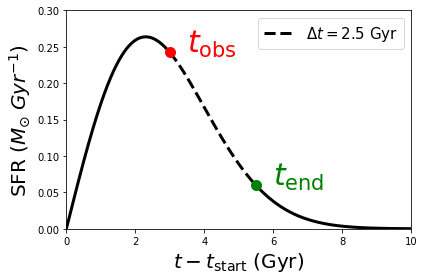

In [97]:
t_start = 3.
dt= 2.5


ts1 = np.arange(0,t_start,0.001)
ts2 = np.arange(t_start,t_start+dt,0.001)
ts3 = np.arange(t_start+dt,10,0.001)

#lines
plt.plot(ts1,SFR_exp_del(ts1,2.3),"k",lw=3)
plt.plot(ts2,SFR_exp_del(ts2,2.3),"k--",lw=3,label=r'$\Delta t = %3.1f$ Gyr'%dt)
plt.plot(ts3,SFR_exp_del(ts3,2.3),"k",lw=3)

#text
plt.text(t_start+0.5,SFR_exp_del(t_start,2.3),r"$t_{\rm{obs}}$",fontsize=30,color='r')
plt.text(t_start+dt+0.5,SFR_exp_del(t_start+dt,2.3),r"$t_{\rm{end}}$",fontsize=30,color='g')

#points
plt.plot(t_start,SFR_exp_del(t_start,2.3),".r",markersize=20)
plt.plot(t_start+dt,SFR_exp_del(t_start+dt,2.3),".g",markersize=20)

#settings
plt.ylim(0,0.3)
plt.xlim(0.,10.)
plt.xlabel(r"$t -t_{\rm{start}}$ (Gyr)",fontsize=20)
plt.ylabel(r"SFR $(M_{\odot} \; Gyr^{-1})$",fontsize=20)
plt.legend(fontsize=15,numpoints=1)
plt.tight_layout()
plt.savefig('../plots/015/SFH_smooth_2points.png')
plt.show()

# NO QUENCH

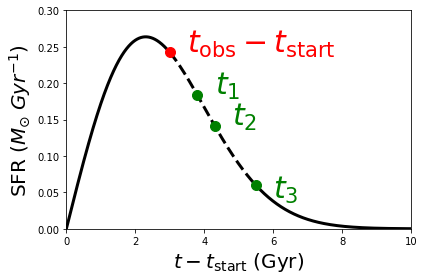

In [135]:
#Almost automatic: parameters here at the beginning

t1 = 3.0 #t_start
dt1= 0.8
dt2= 1.3
dt3=2.5

#set the shape of the SFH
tau =2.3

ts1 = np.arange(0,t1,0.001)
ts2 = np.arange(t1,t1+dt3,0.001)
ts3 = np.arange(t1+dt3,10,0.001)

#lines
plt.plot(ts1,SFR_exp_del(ts1,tau),"k",lw=3)
plt.plot(ts2,SFR_exp_del(ts2,tau),"k--",lw=3,label=r'$\Delta t$ (Gyr)')
plt.plot(ts3,SFR_exp_del(ts3,tau),"k",lw=3)

#text
plt.text(t1+0.5,s1+0.001,r"$t_{\rm{obs}}-t_{\rm{start}}$",fontsize=30,color='r')
plt.text(t1+dt3+0.5,s2+0.001,r"$t_3$",fontsize=30,color='g')

plt.text(t1+dt1+0.5,SFR_exp_del(t1+dt1,tau)+0.001,r"$t_1$",fontsize=30,color='g')
plt.text(t1+dt2+0.5,SFR_exp_del(t1+dt2,tau)+0.001,r"$t_2$",fontsize=30,color='g')

#points

#t_obs
plt.plot(t1,SFR_exp_del(t1,tau),".r",markersize=20)
#t1
plt.plot(t1+dt1,SFR_exp_del(t1+dt1,tau),".g",markersize=20)
#t2
plt.plot(t1+dt2,SFR_exp_del(t1+dt2,tau),".g",markersize=20)
#t_3
plt.plot(t1+dt3,SFR_exp_del(t1+dt3,tau),".g",markersize=20)

#settings
plt.ylim(0,0.3)
plt.xlim(0.,10.)
plt.xlabel(r"$t -t_{\rm{start}}$ (Gyr)",fontsize=20)
plt.ylabel(r"SFR $(M_{\odot} \; Gyr^{-1})$",fontsize=20)
#plt.legend(fontsize=15,numpoints=1)
plt.tight_layout()

plt.savefig('../plots/015/SFH_no_quench.png')
plt.show()

# QUENCH 0

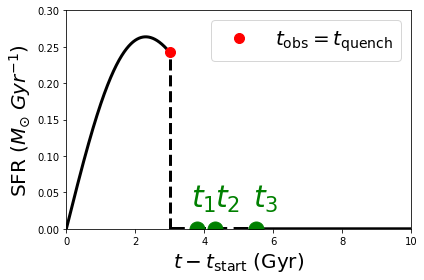

In [134]:
#Almost automatic: parameters here at the beginning

t1 = 3.0 # t_start
dt1= 0.8
dt2= 1.3
dt3=2.5

tau =2.3


ts1 = np.arange(0,t1,0.001)
ts2 = np.arange(t1,t1+dt3,0.001)
ts3 = np.arange(t1+dt3,10,0.001)

plt.axvline(x=t1,ymin=0.,ymax=SFR_exp_del(t1,tau)/0.3,ls='dashed',color='k',lw=3)
#the 10. factor comes from the fact that xmin and xmax must be given in normalised units
plt.axhline(y=0.,xmin=t1/10.,xmax=(t1+dt3)/10.,ls='dashed',color='k',lw=4)


#lines
plt.plot(ts1,SFR_exp_del(ts1,tau),"k",lw=3)
#plt.plot(ts2,SFR_exp_del(ts2,tau),"k--",lw=3,label=r'$\Delta t$ (Gyr)')
plt.plot(ts3,ts3*0.,"k",lw=3)

#text
#t start

#plt.text(t1+0.5,s1+0.001,r"$t_{\rm{obs}} = t_{\rm{quench}}$",fontsize=30,color='r')

#t1 t2 t3
plt.text(t1+dt1-0.2,0.03,r"$t_1$",fontsize=30,color='g')
plt.text(t1+dt2+0.0,0.03,r"$t_2$",fontsize=30,color='g')
plt.text(t1+dt3-0.1,0.03,r"$t_3$",fontsize=30,color='g')

#points
plt.plot(t1,SFR_exp_del(t1,tau),".r",markersize=20,label=r"$t_{\rm{obs}} = t_{\rm{quench}}$")
plt.plot(t1+dt3,0.,".g",markersize=30)
plt.plot(t1+dt1,0.,".g",markersize=30)
plt.plot(t1+dt2,0.,".g",markersize=30)

#settings
plt.ylim(0,0.3)
plt.xlim(0.,10.)
plt.xlabel(r"$t -t_{\rm{start}}$ (Gyr)",fontsize=20)
plt.ylabel(r"SFR $(M_{\odot} \; Gyr^{-1})$",fontsize=20)
plt.legend(fontsize=20,numpoints=1)

plt.tight_layout()
plt.savefig('../plots/015/SFH_quench_0.png')
plt.show()

In [90]:
########################################################################

# Automatic plotting of random quench

In [125]:
def PLOT_SFH(t_start=3.,dt1=0.99,dt2=2.06,dt3=3.26,dt_quench=0.5,random_quench=1.,namefig="../plots/015/SFH_quench_1.png",save_fig=False):
    fig = plt.figure(0,figsize=(6,4))

    ###
    #t_start = 3.0 #Gyr

    t_1 = t_start+dt1

    t_quench = t_start+dt_quench

    t_2 = t_start+dt2 

    t_end = t_start+dt3

    ###
    tau =2.3

    s_start = SFR_exp_del(t_start,tau)
    s_end = SFR_exp_del(t_end,tau)


    ts1 = np.arange(0,t_start,0.001)
    ts2 = np.arange(t_start,t_quench,0.001)
    ts3 = np.arange(t_quench,t_end,0.001)
    ts4 = np.arange(t_end,10,0.001)

    #lines
    plt.plot(ts1,SFR_exp_del(ts1,tau),"k",lw=3)
    plt.plot(ts2,SFR_exp_del(ts2,tau),"k--",lw=3)#,label=r'$\Delta t$ (Gyr)')
    plt.plot(ts3,ts3*.0,"k--",lw=3)
    plt.plot(ts4,ts4*0,"k",lw=3)


    #text
    plt.text(t_start+0.5,s_start+0.001,r"$t_{\rm{obs}}-t_{\rm{start}}$",fontsize=30,color='r')
    plt.text(t_1-0.1,0.03,r"$t_1$",fontsize=30,color='g')
    plt.text(t_quench+0.5,SFR_exp_del(t_quench,tau)-0.01,r"$t_{\rm{quench}}$",fontsize=30,color='k') #quench
    plt.text(t_2+0.05,0.03,r"$t_2$",fontsize=30,color='g')
    plt.text(t_end-0.1,0.03,r"$t_3$",fontsize=30,color='g')

    #points
    plt.plot(t_start,s_start,".r",markersize=20)
    plt.plot(t_1,0.,".g",markersize=30)
    plt.plot(t_quench,SFR_exp_del(t_quench,tau),".k",markersize=20) #quench
    plt.plot(t_2,0.,".g",markersize=30)
    plt.plot(t_end,0.,".g",markersize=30)

    #vertical lines
    plt.axvline(x=t_quench,ymin=0.,ymax=SFR_exp_del(t_quench,tau)/0.3,ls='dashed',color='k',lw=3)

    section = np.arange(t_start,t_start+random_quench,0.001)
    plt.fill_between(section,SFR_exp_del(section,tau),alpha=0.5,label=r"$\Delta t_{\rm{quench}}$")

    #settings
    plt.ylim(0,0.3)
    plt.xlim(0.,10.)
    plt.xlabel(r"$t -t_{\rm{start}}$ (Gyr)",fontsize=20)
    plt.ylabel(r"SFR $(M_{\odot} \; Gyr^{-1})$",fontsize=20)
    plt.legend(fontsize=17,numpoints=1,loc=5)
    plt.tight_layout()
    if save_fig:
        plt.savefig(namefig)

    return fig

In [126]:
# old default values of evolution are: 
#dt1 =0.99; 
#dt2=2.06; 
#dt3=3.26
# new values are:
#dt1 =0.8; 
#dt2=1.3; 
#dt3=2.5.

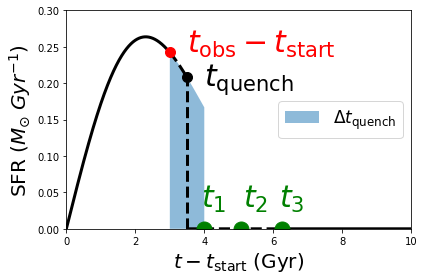

In [127]:
# OLD VALUES
PLOT_SFH(t_start=3.,
         dt1=0.99,
         dt2=2.06,
         dt3=3.26,
         dt_quench=0.5,
         random_quench=1.,
         save_fig=False,
         namefig="../plots/015/SFH_quench_1.png")
plt.show()

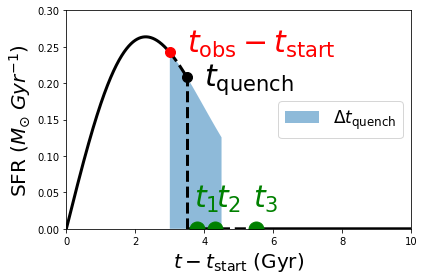

In [137]:
# NEW VALUES
PLOT_SFH(t_start=3.,
         dt1=0.8,
         dt2=1.3,
         dt3=2.5,
         dt_quench=0.5,
         random_quench=1.5,
         save_fig=False,
         namefig="../plots/015/SFH_quench_1_5.png")
plt.show()

# Plot that explain that t_start can be different

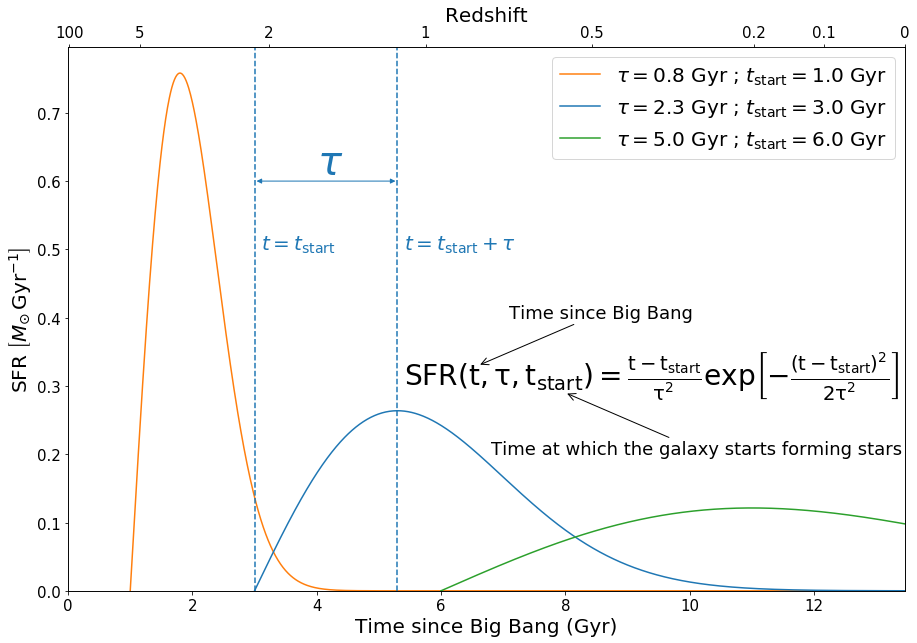

In [23]:
from astropy.cosmology import FlatLambdaCDM, z_at_value # you can also import WMAP7
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70,Om0=0.3)

#ages= np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr
#ageticks = [z_at_value(cosmo.age, age) for age in ages]

#redshifts = np.array([0,0.1,0.2,0.5,1,2,3,4,5,6,7,8,100])
redshifts = np.array([0,0.1,0.2,0.5,1,2,5,100])
redshift_ticks = [cosmo.age(z=zz).value for zz in redshifts]
#redshift_ticks = [0,2,4,6,8,10,12]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cosmic_times = np.arange(0.,cosmo.age(z=0.).value,0.01)
ax.plot(cosmic_times,SFH_exp_del(cosmic_times,tau=0.8,t_form=1.),label=r'$\tau = 0.8$ Gyr ; $t_{\rm{start}}= 1.0$ Gyr',c="C1")
ax.plot(cosmic_times,SFH_exp_del(cosmic_times,tau=2.3,t_form=3.),label=r'$\tau = 2.3$ Gyr ; $t_{\rm{start}}= 3.0$ Gyr',c="C0")
ax.plot(cosmic_times,SFH_exp_del(cosmic_times,tau=5.,t_form=6.),label=r'$\tau = 5.0$ Gyr ; $t_{\rm{start}}= 6.0$ Gyr',c="C2")
#ax.plot(cosmic_times+1,SFR_exp_del(cosmic_times,1.3))
#ax.plot(cosmic_times+0.5,SFR_exp_del(cosmic_times,0.7))
#ax.plot(cosmic_times+2,SFR_exp_del(cosmic_times,5.))

#redshifts=[]
#for cosmic_time in cosmic_times:
#    redshifts.append(z_at_value(cosmo.age,cosmic_time*u.Gyr))

ax2= ax.twiny()
ax2.set_xticks(redshift_ticks)

ax2.set_xticklabels(['{:g}'.format(zz) for zz in redshifts]);


ax.axvline(3.,ls='--')
ax.axvline(3.+2.3,ls='--')
#ax.axvline(3)
#ax.axhline(0)
#ax.axvline(1.3+1)
#ax.axvline(0.7+0.5)
#ax.axvline(5.+2.)
    
ax.set_ylim(0.,)
ax.set_xlim(0.,cosmo.age(z=0.).value)
    
ax.set_ylabel(r'SFR $\left[ M_{\odot} \, \rm{Gyr}^{-1}\right]$',fontsize=20)

ax.set_xlabel('Time since Big Bang (Gyr)',fontsize=20)
ax2.set_xlabel('Redshift', fontsize=20)

ax.annotate("", xy=(3.+2.3, 0.6), xytext=(3., 0.6),arrowprops=dict(arrowstyle="<|-|>",color='C0'))
ax.text(4.,0.61,r"$\tau$",fontsize=40,color='C0')
ax.text(3.1,0.5,r"$t=t_{\rm{start}}$",fontsize=20,color='C0')
ax.text(3.1+2.3,0.5,r"$t=t_{\rm{start}}+\tau$",fontsize=20,color='C0')

ax.text(5.4,0.3,r"$\rm{SFR}(t,\tau,t_{\rm{start}}) = \frac{t-t_{\rm{start}}}{\tau^2}\exp \left[ -\frac{(t-t_{\rm{start}})^2}{2\tau^2}\right]$",fontsize=28)

ax.annotate("Time since Big Bang", xy=(6.6, 0.33), xytext=(7.1, 0.4),arrowprops=dict(arrowstyle="->",color='k'),fontsize=18)

ax.annotate("Time at which the galaxy starts forming stars", xy=(8., 0.29), xytext=(6.8, 0.2),arrowprops=dict(arrowstyle="->",color='k'),fontsize=18)

ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

ax.legend(fontsize=20)

plt.savefig("../plots/015/SFH_with_equation.png")
plt.show()

In [44]:
cosmo.age(z=0.).value

13.466983946956363

In [56]:
SFR_exp_del_tform(cosmic_times,2.3,3.)[0]

0.0

In [59]:
SFR_exp_del_tform(cosmic_times,2.3,3.)

array([0.00000000e+00, 1.89034130e-03, 3.78057540e-03, ...,
       6.62532382e-05, 6.50201315e-05, 6.38087107e-05])

In [74]:
ages

<Quantity [13. , 10. ,  8. ,  6. ,  5. ,  4. ,  3. ,  2. ,  1.5,  1.2,
            1. ] Gyr>